In [39]:
import sys
import os

# Assuming your notebook is in a subdirectory and you need to go up two levels
parent_dir = os.path.abspath('../')

# Add the parent directory to sys.path
if parent_dir not in sys.path:
    sys.path.append(parent_dir)
    
from utils import get_save_path
from eval_one_file import main as eval_one_file
import copy

In [40]:
from utils import get_save_path
from eval_one_file import main as eval_one_file
import copy


text_type = 'caption'


configs = {
    'baseline w/img': {'ds_name': 'facebook/textvqa', 'model_name': 'llava-hf/llava-1.5-7b-hf', 'seed': 0, 't': 0, 'in_type': 'w-img', 'intext_type': '', 'ocr_parser': '',},
    f'baseline w/text ({text_type})': {'ds_name': 'facebook/textvqa', 'model_name': 'llava-hf/llava-1.5-7b-hf', 'seed': 0, 't': 0, 'in_type': 'wo-img', 'intext_type': text_type, 'ocr_parser': 'easyocr', 'text_source': '', 'cap_num': 1},
    f'img+text({text_type})': {'ds_name': 'facebook/textvqa', 'model_name': 'llava-hf/llava-1.5-7b-hf', 'seed': 0, 't': 0, 'in_type': 'w-img', 'intext_type': text_type, 'ocr_parser': 'easyocr', 'text_source': '', 'cap_num': 1},
}



ds_names = [
    'lmms-lab/VQAv2',
    # 'lmms-lab/DocVQA/DocVQA',
]

intext_types = [

    'caption+custom-25;contradict_stat',
    'caption+custom-25;supp_stat',
    'caption+custom-25;irrel_wikitext',
]


test_ft = True

test_ft = False

if test_ft:
    model_names = [
        
        'llava-hf/llava-v1.6-vicuna-7b-hf',
        'model_ckpts/sft_llava-1.6-vicuna-7b_bs1_1024_main-checkpoint-1875',
        
        'Qwen/Qwen2-VL-7B-Instruct',
        'model_ckpts/sft_qwenvl-7b_bs1_1024_main_moreprojs/checkpoint-1875',

    ]
else:
    model_names = [

    # 'llava-hf/llava-1.5-7b-hf',

    'llava-hf-llava-v1.6-vicuna-7b-hf',
    # 'llava-hf/llava-v1.6-vicuna-13b-hf',
    # 'llava-hf/llava-v1.6-34b-hf',
    
    # 'microsoft/Phi-3.5-vision-instruct',
    # 'Qwen/Qwen2-VL-7B-Instruct',
    # 'gpt-4o-mini-2024-07-18',
    # 'gpt-4o-2024-05-13',
    # 'claude-3-haiku-20240307',    
    # 'claude-3-5-sonnet-20240620',
    # 'allenai/Molmo-7B-D-0924',
    
        'gpt-4.1-mini-2025-04-14',
        'claude-3-7-sonnet-20250219',
    ]


In [41]:
res = {}

for ds_name in ds_names:
    for model_name in model_names:
        for _intext_type in intext_types:
            _configs = copy.deepcopy(configs)

            tag_name = f'{ds_name} {model_name} {_intext_type}'

            res[tag_name] = {}

            for k, v in _configs.items():

                v['ds_name'] = ds_name
                v['model_name'] = model_name
                
                if v['intext_type'] != '':
                    if ';' in _intext_type:
                        v['intext_type'], v['text_source'] = _intext_type.split(';')
                        if 'supp_stat' in v['text_source'] or 'contradict_stat' in v['text_source']:
                            v['text_src_model'] = 'gpt-4o-2024-05-13' 
                    else:
                        v['intext_type'] = _intext_type
                    # v['intext_type'] = _intext_type
                    
                # if 'irrel' in v['intext_type']:
                #     v['text_source'] = 'irrel_wikitext'

                # if v['intext_type'] != '' and v['in_type'] == 'w-img':
                #     v['intext_type'] = _intext_type
                if 'irrel' in v['intext_type'] or 'irrel' in v.get('text_source', '') or 'random' in v.get('text_source', ''):
                    v['cap_num'] = -1
                elif '+' in v.get('text_source', ''):
                    v['cap_num'] = 2
                


                f = get_save_path(v)
                print(f)            

                res[tag_name][k] = eval_one_file({
                        'file_name': f,
                        'verbose': True,
                        # 'max_num_samples': 1000,
                        # 'max_num_samples': 100,
                        'max_num_samples': 500,
                    })['verbose']


/home/ailin/projs/blind-faith-in-text/raw_code/outputs/lmms-lab/VQAv2/llava-hf-llava-v1.6-vicuna-7b-hf//t=0_seed=0.jsonl
/home/ailin/projs/blind-faith-in-text/raw_code/outputs/lmms-lab/VQAv2/llava-hf-llava-v1.6-vicuna-7b-hf//t=0_seed=0_intype=wo-img_intext=caption+custom-25_textsrc=contradict_stat_textsrcmodel=gpt-4o-2024-05-13_capnum=1.jsonl
/home/ailin/projs/blind-faith-in-text/raw_code/outputs/lmms-lab/VQAv2/llava-hf-llava-v1.6-vicuna-7b-hf//t=0_seed=0_intext=caption+custom-25_textsrc=contradict_stat_textsrcmodel=gpt-4o-2024-05-13_capnum=1.jsonl
/home/ailin/projs/blind-faith-in-text/raw_code/outputs/lmms-lab/VQAv2/llava-hf-llava-v1.6-vicuna-7b-hf//t=0_seed=0.jsonl
/home/ailin/projs/blind-faith-in-text/raw_code/outputs/lmms-lab/VQAv2/llava-hf-llava-v1.6-vicuna-7b-hf//t=0_seed=0_intype=wo-img_intext=caption+custom-25_textsrc=supp_stat_textsrcmodel=gpt-4o-2024-05-13_capnum=1.jsonl
/home/ailin/projs/blind-faith-in-text/raw_code/outputs/lmms-lab/VQAv2/llava-hf-llava-v1.6-vicuna-7b-hf//t=

In [42]:
from utils import get_modality_prefer_score

reports = {}
for tag in res:
    reports[tag] = get_modality_prefer_score({
        'img_text': res[tag][f'img+text({text_type})'],
        'only_text': res[tag][f'baseline w/text ({text_type})'],
        'only_img': res[tag]['baseline w/img']
    })

In [43]:
details = {}

for tag, report in reports.items():
    details[tag] = {}
    for que_id, detail in report['details'].items():
        status = detail['status']
        # if 'Recognition' not in que_id or 'Mathematical' in que_id:
        #     continue
        
        if details[tag].get(que_id) is None:
            details[tag][que_id] = {}
        
        details[tag][que_id].update({
            'status': status,
            'img_score': detail['img_score'],
            'text_score': detail['text_score'],
            'img_acc': detail['img_acc'],
            'text_acc': detail['text_acc'],
            'img_text_acc': detail['img_text_acc'],
            'img==text': detail['img==text'],
            'input': detail['input'],
        }) 

In [44]:
import copy
import pandas as pd

prefer_score_models = {}

# add dataset, model name, and intext_type as columns
prefer_df = pd.DataFrame(columns=['ds_name', 'model_name', 'intext_type', ])
rows_to_add = []  # List to collect rows


for tag, report in reports.items():
    print(tag)
    _report = copy.deepcopy(report)
    del  _report['details'] 
    print(_report)
    print()
    
    row = {
        'ds_name': tag.split(' ')[0],
        'model_name': tag.split(' ')[1],
        'intext_type': tag.split(' ')[2],
        **_report
    }
    rows_to_add.append(row)
    
prefer_df = pd.concat([prefer_df, pd.DataFrame(rows_to_add)], ignore_index=True)

        

    

lmms-lab/VQAv2 llava-hf-llava-v1.6-vicuna-7b-hf caption+custom-25;contradict_stat
{'use_img_count': 53, 'use_text_count': 360, 'neither_count': 4, 'both_count': 13, 'same_count': 58, 'undefined_count': 12, 'img_text_ratio': 0.12832929782082325, 'corse_img_text_ratio': 0.13291357833611356}

lmms-lab/VQAv2 llava-hf-llava-v1.6-vicuna-7b-hf caption+custom-25;supp_stat
{'use_img_count': 17, 'use_text_count': 123, 'neither_count': 2, 'both_count': 13, 'same_count': 341, 'undefined_count': 4, 'img_text_ratio': 0.12142857142857143, 'corse_img_text_ratio': 0.1531960595686086}

lmms-lab/VQAv2 llava-hf-llava-v1.6-vicuna-7b-hf caption+custom-25;irrel_wikitext
{'use_img_count': 306, 'use_text_count': 16, 'neither_count': 16, 'both_count': 12, 'same_count': 143, 'undefined_count': 7, 'img_text_ratio': 0.9503105590062112, 'corse_img_text_ratio': 0.9292926052656592}

lmms-lab/VQAv2 gpt-4.1-mini-2025-04-14 caption+custom-25;contradict_stat
{'use_img_count': 151, 'use_text_count': 81, 'neither_count': 1

In [45]:
cols = prefer_df.columns.tolist()
cols = cols[:3] + cols[-2:] + cols[3:-2]
prefer_df = prefer_df[cols]
prefer_df

# average img_text_ratio for each model when intext_type is not oracle and irrel_wikitext
print(prefer_df[(prefer_df['intext_type'] == 'caption+custom-24')].groupby('model_name')['img_text_ratio'].mean())

print(prefer_df[(prefer_df['intext_type'] == 'caption+custom-24;conflict_answer')].groupby('model_name')['img_text_ratio'].mean())


Series([], Name: img_text_ratio, dtype: float64)
Series([], Name: img_text_ratio, dtype: float64)


In [46]:
# add confidence information
import numpy as np

def get_confidence(logprobs):
    # return np.mean(logprobs)
    # return logprobs[0]
    # return logprobs[-1]
    return np.exp(np.mean(logprobs))
    # # return np.power(np.exp(np.sum(logprobs)), 1/len(logprobs))


# get each question use_which and img_conf, text_conf, img_text_conf
for tag in res:
    img_outputs = res[tag]['baseline w/img']
    text_outputs = res[tag][f'baseline w/text ({text_type})']
    img_text_outputs = res[tag][f'img+text({text_type})']
    
    img_text_que_ids = []
    for item in img_text_outputs:
        question_id = item['question_id']
        img_text_que_ids.append(question_id)
    img_que_ids = []
    for item in img_outputs:
        question_id = item['question_id']
        img_que_ids.append(question_id)
    text_que_ids = []
    for item in text_outputs:
        question_id = item['question_id']
        text_que_ids.append(question_id)
    
    common_que_ids = set(img_text_que_ids) & set(img_que_ids) & set(text_que_ids)
    
    
    # get confidencs
    for out in img_outputs:
        que_id = out['question_id']
        
        # if 'Recognition' not in que_id or 'Mathematical' in que_id:
        #     continue
        
        if que_id not in common_que_ids:
            continue
        
        details[tag][que_id].update({
            # 'img_conf': out['logprobs'][0],
            'img_conf': get_confidence(out['logprobs'])
        })
    
    for out in text_outputs:
        que_id = out['question_id']
        
        # if 'Recognition' not in que_id or 'Mathematical' in que_id:
        #     continue
        
        if que_id not in common_que_ids:
            continue

        details[tag][que_id].update({
            # 'text_conf': out['logprobs'][0],
            'text_conf': get_confidence(out['logprobs'])
        })
    
    for out in img_text_outputs:
        que_id = out['question_id']
        
        # if 'Recognition' not in que_id or 'Mathematical' in que_id:
        #     continue
        if que_id not in common_que_ids:
            continue
        
        details[tag][que_id].update({
            # 'img_text_conf': out['logprobs'][0],
            'img_text_conf': get_confidence(out['logprobs'])
        })
    
    


/home/ailin/miniconda3/envs/v_eval/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/ailin/miniconda3/envs/v_eval/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [47]:
# show performance
import pandas as pd

# create a result dataframe with columns: tag, img_acc, text_acc, img_text_acc
res_df = pd.DataFrame(columns=['dataset', 'model', 'prompt', 'img_acc', 'text_acc', 'img_text_acc'])

status_group_res_df = pd.DataFrame(columns=['dataset', 'model', 'prompt', 'img_acc', 'text_acc', 'img_text_acc', 'status_group'])

include_tags = ['img', 'text', 'both', 'neither', 'same', 'undefined']
# include_tags = ['img', 'text']

for tag in details:
    img_conf = []
    text_conf = []
    img_text_conf = []
    use_imgs = []
    use_texts = []
    img_text_conf_diff = []
    text_img_conf_diff = []
    img_accs = []
    text_accs = []
    img_text_accs = []
    
    status_group_masks = {
        'img': [],
        'text': [],
        'both': [],
        'neither': [],
        'same': [],
        'undefined': []
    }
    
    for que_id, v in details[tag].items():
        
        # if v['status'] not in ['img', 'text', 'both']:
        # if v['status'] not in ['img', 'text', 'both', 'neither']:
        # if v['status'] not in ['img', 'text', 'both', 'neither', 'same', 'undefined']:
        # if v['status'] not in ['img', 'text']:
        # if v['status'] not in ['both']:
        if v['status'] not in include_tags:
            continue

        
        img_conf.append(v['img_conf'])
        text_conf.append(v['text_conf'])
        img_text_conf.append(v['img_text_conf'])
        # use_imgs.append(v['status'] == 'img')
        # use_texts.append(v['status'] == 'text')
        
        # use_imgs.append(v['score'])
        # use_texts.append(1 - v['score'])
        
        use_imgs.append(v['img_score'])
        use_texts.append(v['text_score'])
        
        img_accs.append(v['img_acc'])
        text_accs.append(v['text_acc'])
        img_text_accs.append(v['img_text_acc'])
        
        for k in status_group_masks.keys():
            if k != v['status']:
                status_group_masks[k].append(False)
            else:
                status_group_masks[k].append(True)
        
        
        # img_text_conf_diff.append((v['img_conf'] - v['text_conf'])/v['text_conf'])
        # text_img_conf_diff.append((v['img_conf'] - v['text_conf'])/v['img_conf'])
        img_text_conf_diff.append((v['img_conf'] - v['text_conf'])) # best
        
    
    img_conf = np.array(img_conf)
    text_conf = np.array(text_conf)
    img_text_conf = np.array(img_text_conf)
    use_imgs = np.array(use_imgs)
    use_texts = np.array(use_texts)
    img_text_conf_diff = np.array(img_text_conf_diff)
    text_img_conf_diff = np.array(text_img_conf_diff)
    img_accs = np.array(img_accs)
    text_accs = np.array(text_accs)
    img_text_accs = np.array(img_text_accs)
    
    print(tag)
    print('avg img acc', np.mean(img_accs), len(img_accs))
    print('avg text acc', np.mean(text_accs), len(text_accs))
    print('avg img_text acc', np.mean(img_text_accs), len(img_text_accs))
    
    res_df = pd.concat([res_df, pd.DataFrame([{
        'dataset': tag.split()[0],
        'model': tag.split()[1],
        'prompt': tag.split()[2],
        'img_acc': np.mean(img_accs),
        'text_acc': np.mean(text_accs),
        'img_text_acc': np.mean(img_text_accs),
        'max_img_text_acc': np.max([img_accs, text_accs], axis=0).mean(),
        'img_conf': np.mean(img_conf),
        'text_conf': np.mean(text_conf),
        'img_text_conf': np.mean(img_text_conf),
        'count': int(len(img_accs))
    }])], ignore_index=True)
    
    for k in status_group_masks:
        status_group_res_df = pd.concat([status_group_res_df, pd.DataFrame([{
            'dataset': tag.split()[0],
            'model': tag.split()[1],
            'prompt': tag.split()[2],
            'img_acc': np.mean(img_accs[status_group_masks[k]]).round(2),
            'text_acc': np.mean(text_accs[status_group_masks[k]]).round(2),
            'img_text_acc': np.mean(img_text_accs[status_group_masks[k]]).round(2),
            'max_img_text_acc': np.max([img_accs[status_group_masks[k]], text_accs[status_group_masks[k]]], axis=0).mean().round(2),
            'img_conf': np.mean(img_conf[status_group_masks[k]]).round(2),
            'text_conf': np.mean(text_conf[status_group_masks[k]]).round(2),
            'img_text_conf': np.mean(img_text_conf[status_group_masks[k]]).round(2),
            'status_group': k,
            'count': np.sum(status_group_masks[k])
        }])], ignore_index=True)
    
    status_group_res_df = pd.concat([status_group_res_df, pd.DataFrame([{
            'dataset': tag.split()[0],
            'model': tag.split()[1],
            'prompt': tag.split()[2],
            'img_acc': np.mean(img_accs).round(2),
            'text_acc': np.mean(text_accs).round(2),
            'img_text_acc': np.mean(img_text_accs).round(2),
            'max_img_text_acc': np.max([img_accs, text_accs], axis=0).mean().round(2),
            'img_conf': np.mean(img_conf).round(2),
            'text_conf': np.mean(text_conf).round(2),
            'img_text_conf': np.mean(img_text_conf).round(2),
            'status_group': 'avg',
            'count': len(img_accs)
    }])], ignore_index=True)

lmms-lab/VQAv2 llava-hf-llava-v1.6-vicuna-7b-hf caption+custom-25;contradict_stat
avg img acc 81.06 500
avg text acc 18.86 500
avg img_text acc 28.0 500
lmms-lab/VQAv2 llava-hf-llava-v1.6-vicuna-7b-hf caption+custom-25;supp_stat
avg img acc 81.06 500
avg text acc 93.38 500
avg img_text acc 93.16 500
lmms-lab/VQAv2 llava-hf-llava-v1.6-vicuna-7b-hf caption+custom-25;irrel_wikitext
avg img acc 81.06 500
avg text acc 39.82 500
avg img_text acc 80.58 500
lmms-lab/VQAv2 gpt-4.1-mini-2025-04-14 caption+custom-25;contradict_stat
avg img acc 75.22 500
avg text acc 18.76 500
avg img_text acc 66.0 500
lmms-lab/VQAv2 gpt-4.1-mini-2025-04-14 caption+custom-25;supp_stat
avg img acc 75.22 500
avg text acc 89.46 500
avg img_text acc 83.6 500
lmms-lab/VQAv2 gpt-4.1-mini-2025-04-14 caption+custom-25;irrel_wikitext
avg img acc 75.22 500
avg text acc 30.3 500
avg img_text acc 75.96 500
lmms-lab/VQAv2 claude-3-7-sonnet-20250219 caption+custom-25;contradict_stat
avg img acc 71.84 500
avg text acc 24.08 500


/tmp/ipykernel_142131/1340698715.py:88: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame([{
/tmp/ipykernel_142131/1340698715.py:103: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  status_group_res_df = pd.concat([status_group_res_df, pd.DataFrame([{


In [48]:
import pandas as pd

# Set the maximum number of rows and columns to display
pd.set_option('display.max_rows', 100)  # Set this to the number of rows you want
pd.set_option('display.max_columns', 20)  # Set this to the number of columns you want

In [49]:
res_df.groupby(['dataset', 'model', 'prompt']).mean()

img_acc  \
dataset        model                            prompt                                       
lmms-lab/VQAv2 claude-3-7-sonnet-20250219       caption+custom-25;contradict_stat    71.84   
                                                caption+custom-25;irrel_wikitext     71.84   
                                                caption+custom-25;supp_stat          71.84   
               gpt-4.1-mini-2025-04-14          caption+custom-25;contradict_stat    75.22   
                                                caption+custom-25;irrel_wikitext     75.22   
                                                caption+custom-25;supp_stat          75.22   
               llava-hf-llava-v1.6-vicuna-7b-hf caption+custom-25;contradict_stat    81.06   
                                                caption+custom-25;irrel_wikitext     81.06   
                                                caption+custom-25;supp_stat          81.06   

                                                                                   text_acc  \
dataset        model                            prompt                                        
lmms-lab/VQAv2 claude-3-7-sonnet-20250219       caption+custom-25;contradict_stat     24.08   
                                                caption+custom-25;irrel_wikitext      29.94   
                                                caption+custom-25;supp_stat           89.28   
               gpt-4.1-mini-2025-04-14          caption+custom-25;contradict_stat     18.76   
                                                caption+custom-25;irrel_wikitext      30.30   
                                                caption+custom-25;supp_stat           89.46   
               llava-hf-llava-v1.6-vicuna-7b-hf caption+custom-25;contradict_stat     18.86   
                                                caption+custom-25;irrel_wikitext      39.82   
                                                caption+custom-25;supp_stat           93.38   

                                                                                   img_text_acc  \
dataset        model                            prompt                                            
lmms-lab/VQAv2 claude-3-7-sonnet-20250219       caption+custom-25;contradict_stat         72.78   
                                                caption+custom-25;irrel_wikitext          74.38   
                                                caption+custom-25;supp_stat               82.30   
               gpt-4.1-mini-2025-04-14          caption+custom-25;contradict_stat         66.00   
                                                caption+custom-25;irrel_wikitext          75.96   
                                                caption+custom-25;supp_stat               83.60   
               llava-hf-llava-v1.6-vicuna-7b-hf caption+custom-25;contradict_stat         28.00   
                                                caption+custom-25;irrel_wikitext          80.58   
                                                caption+custom-25;supp_stat               93.16   

                                                                                   max_img_text_acc  \
dataset        model                            prompt                                                
lmms-lab/VQAv2 claude-3-7-sonnet-20250219       caption+custom-25;contradict_stat             78.74   
                                                caption+custom-25;irrel_wikitext              79.08   
                                                caption+custom-25;supp_stat                   92.50   
               gpt-4.1-mini-2025-04-14          caption+custom-25;contradict_stat             77.86   
                                                caption+custom-25;irrel_wikitext              78.40   
                                                caption+custom-25;supp_stat                   91.52   
               llava-hf-llava-v1.6-vicuna-7b-hf caption+custom-25;contradict_stat       

In [50]:
# rewrite the prompt mapping
prompt_mapping = {

    'caption+custom-25;supp_stat': 'match',
    'caption+custom-25;contradict_stat': 'conflict',
    'caption+custom-25;irrel_wikitext': 'irrelevant',
    


}

model_mapping = {
    'gpt-4o-2024-05-13': 'GPT-4o',
    'gpt-4o-mini-2024-07-18': 'GPT-4o mini',
    'llava-hf-llava-v1.6-mistral-7b-hf': 'LLaVA-v1.6-mistral-7b',
    'llava-hf-llava-v1.6-vicuna-7b-hf': 'LLaVA-NeXT-7B',
    'llava-hf-llava-v1.6-vicuna-13b-hf': 'LLaVA-NeXT-13B',
    # 'llava-hf-llava-v1.6-34b-hf': 'llava-v1.6-34b',
    'llava-hf/llava-1.5-7b-hf': 'LLaVA-v1.5-7B',
    'llava-hf/llava-1.5-13b-hf': 'LLaVA-v1.5-13B',
    'llava-hf/llava-v1.6-vicuna-7b-hf': 'LLaVA-NeXT-7B',
    'llava-hf/llava-v1.6-vicuna-13b-hf': 'LLaVA-NeXT-13B',
    'llava-hf/llava-v1.6-34b-hf': 'LLaVA-NeXT-34B',

    'microsoft-Phi-3-vision-128k-instruct': 'Phi3',
    'microsoft/Phi-3.5-vision-instruct': 'Phi3.5',
    'meta-llama/Llama-3.2-11B-Vision-Instruct': 'Llama-3.2-11B-Vision-Instruct',
    'allenai/Molmo-7B-D-0924': 'Molmo-7B-D',
    'claude-3-5-sonnet-20240620': 'Claude Sonnet',
    'claude-3-haiku-20240307': 'Claude Haiku',
    
    'gpt-4.1-mini-2025-04-14': 'GPT-4.1 mini',
    'claude-3-7-sonnet-20250219': 'Claude 3.7 Sonnet',
    
    'Qwen/Qwen2-VL-7B-Instruct': 'Qwen2-VL-7B',


}

show_res_df = res_df.copy()
show_res_df['prompt'] = show_res_df['prompt'].apply(lambda x: prompt_mapping[x])
show_res_df['model'] = show_res_df['model'].apply(lambda x: model_mapping[x])
show_res_df.groupby(['dataset', 'model', 'prompt']).mean()



img_acc  text_acc  img_text_acc  \
dataset        model             prompt                                        
lmms-lab/VQAv2 Claude 3.7 Sonnet conflict      71.84     24.08         72.78   
                                 irrelevant    71.84     29.94         74.38   
                                 match         71.84     89.28         82.30   
               GPT-4.1 mini      conflict      75.22     18.76         66.00   
                                 irrelevant    75.22     30.30         75.96   
                                 match         75.22     89.46         83.60   
               LLaVA-NeXT-7B     conflict      81.06     18.86         28.00   
                                 irrelevant    81.06     39.82         80.58   
                                 match         81.06     93.38         93.16   

                                             max_img_text_acc  img_conf  \
dataset        model             prompt                                   
lmms-lab/VQAv2 Claude 3.7 Sonnet conflict               78.74       NaN   
                                 irrelevant             79.08       NaN   
                                 match                  92.50       NaN   
               GPT-4.1 mini      conflict               77.86  0.858405   
                                 irrelevant             78.40  0.858405   
                                 match                  91.52  0.858405   
               LLaVA-NeXT-7B     conflict               82.34  0.845369   
                                 irrelevant             84.22  0.845369   
                                 match                  94.80  0.845369   

                                             text_conf  img_text_conf  count  
dataset        model             prompt                                       
lmms-lab/VQAv2 Claude 3.7 Sonnet conflict          NaN            NaN  500.0  
                                 irrelevant        NaN            NaN  500.0  
                                 match             NaN            NaN  500.0  
               GPT-4.1 mini      conflict     0.933762       0.866882  500.0  
                                 irrelevant   0.760271       0.859252  500.0  
                                 match        0.930534       0.889401  500.0  
               LLaVA-NeXT-7B     conflict     0.951950       0.910379  500.0  
                                 irrelevant   0.743306       0.831931  500.0  
                                 match        0.956967       0.945333  500.0

In [51]:
res_prompt_mapping = {
    'caption+custom-25;supp_stat': 'match',
    'caption+custom-25;contradict_stat': 'conflict',
    'caption+custom-25;irrel_wikitext': 'irrelevant',

}

res_prompt_mapping = prompt_mapping

paper_res_df = res_df.copy()
paper_res_df['prompt'] = paper_res_df['prompt'].apply(lambda x: res_prompt_mapping[x])
paper_res_df.groupby(['dataset', 'model', 'prompt']).mean()
# format in .3%
# this should be based on the dataset
_paper_res_df = paper_res_df.copy()
for ds in _paper_res_df['dataset'].unique():
    print(ds, _paper_res_df[paper_res_df['dataset'] == ds]['img_acc'].max())
    if _paper_res_df[paper_res_df['dataset'] == ds]['img_acc'].max() < 1:
        # the dataset performance img_acc, text_acc, img_text_acc are in percentage
        paper_res_df.loc[_paper_res_df['dataset'] == ds, ['img_acc', 'text_acc', 'img_text_acc']] = _paper_res_df.loc[_paper_res_df['dataset'] == ds, ['img_acc', 'text_acc', 'img_text_acc']] * 100


paper_res_df = paper_res_df.groupby(['dataset', 'model', 'prompt']).mean().reset_index()
paper_res_df

lmms-lab/VQAv2 81.06


,dataset,model,prompt,img_acc,text_acc,img_text_acc,max_img_text_acc,img_conf,text_conf,img_text_conf,count
0,lmms-lab/VQAv2,claude-3-7-sonnet-20250219,conflict,71.84,24.08,72.78,78.74,NaN,NaN,NaN,500.0
1,lmms-lab/VQAv2,claude-3-7-sonnet-20250219,irrelevant,71.84,29.94,74.38,79.08,NaN,NaN,NaN,500.0
2,lmms-lab/VQAv2,claude-3-7-sonnet-20250219,match,71.84,89.28,82.30,92.50,NaN,NaN,NaN,500.0
3,lmms-lab/VQAv2,gpt-4.1-mini-2025-04-14,conflict,75.22,18.76,66.00,77.86,0.858405,0.933762,0.866882,500.0
4,lmms-lab/VQAv2,gpt-4.1-mini-2025-04-14,irrelevant,75.22,30.30,75.96,78.40,0.858405,0.760271,0.859252,500.0
5,lmms-lab/VQAv2,gpt-4.1-mini-2025-04-14,match,75.22,89.46,83.60,91.52,0.858405,0.930534,0.889401,500.0
6,lmms-lab/VQAv2,llava-hf-llava-v1.6-vicuna-7b-hf,conflict,81.06,18.86,28.00,82.34,0.845369,0.951950,0.910379,500.0
7,lmms-lab/VQAv2,llava-hf-llava-v1.6-vicuna-7b-hf,irrelevant,81.06,39.82,80.58,84.22,0.845369,0.743306,0.831931,500.0
8,lmms-lab/VQAv2,llava-hf-llava-v1.6-vicuna-7b-hf,match,81.06,93.38,93.16,94.80,0.845369,0.956967,0.945333,500.0


In [52]:
import pandas as pd

# Assuming you have a DataFrame named df
# Example structure of the DataFrame from the image

# data = {
#     "model": [
#         "gpt-4o-2024-05-13", "gpt-4o-mini-2024-07-18", "llava-hf/llava-v1.6-vicuna-7b-hf",
#         "llava-hf/llava-1.5-13b-hf", "llava-hf/llava-1.5-7b-hf", "microsoft-Phi-3-vision-128k-instruct"
#     ],
#     "prompt": ["Match", "Corruption", "Match", "Corruption", "Match", "Corruption"],
#     "img_text_acc": [61.54, 59.25, 82.19, 77.42, 81.28, 75.35],
#     "img_conf": [0.875746, 0.902117, 0.841946, 0.827087, 0.841949, 0.811392],
#     "text_conf": [0.795165, 0.902117, 0.818420, 0.936363, 0.805079, 0.932132],
#     "img_text_conf": [0.876450, 0.877745, 0.837669, 0.873735, 0.833141, 0.865716],
# }

df = show_res_df.copy()

# Replace "caption" with "match" and "conflict" with "corruption" in the 'prompt' column
df['prompt'] = df['prompt'].replace({"caption": "Match", "conflict": "Corruption", 'irrelevant': 'Irrelevance'})
df['model'] = df['model'].replace(model_mapping)


# Multiply accuracy columns by 100 and round to 2 decimal places
df["img_text_acc"] = (df["img_text_acc"]).round(2)
df["img_conf"] = df["img_conf"].round(4)
df["text_conf"] = df["text_conf"].round(4)
df["img_text_conf"] = df["img_text_conf"].round(4)

# Format specific columns to different decimal places when converting to LaTeX
def format_specific_columns(row):
    return [
        row["dataset"],
        row["model"],
        row["prompt"],
        f"{row['img_text_acc']:.2f}",     # Format to 2 decimal places
        f"{row['img_text_conf']:.4f}",    # Format to 2 decimal places
        f"{row['img_conf']:.4f}",         # Format to 4 decimal places
        f"{row['text_conf']:.4f}"         # Format to 4 decimal places
    ]

# Apply formatting function to each row and construct LaTeX table
formatted_rows = df.apply(format_specific_columns, axis=1)

# LaTeX header with booktabs and better alignment
latex_table = """
\\begin{table}[htbp]
\\centering
\\renewcommand{\\arraystretch}{1.2}  % Increases row padding
\\begin{tabular}{llcccc}
\\toprule
Dataset & Model & Prompt & img\_text\_acc & img\_text\_conf & img\_conf & text\_conf \\\\
\\midrule
"""

# Initialize a variable to keep track of the last model name
last_model = ""

# Add rows with a line when a new model is encountered
for row in formatted_rows:
    current_model = row[0]
    if current_model != last_model:
        latex_table += "\\midrule\n"  # Add a line for a new model
        last_model = current_model
    latex_table += " & ".join(row) + " \\\\\n"

# LaTeX footer with booktabs
latex_table += "\\bottomrule\n\\end{tabular}\n\\caption{Comparison of model performance under different prompts}\n\\end{table}"

# Output the LaTeX table
print(latex_table)


\begin{table}[htbp]
\centering
\renewcommand{\arraystretch}{1.2}  % Increases row padding
\begin{tabular}{llcccc}
\toprule
Dataset & Model & Prompt & img\_text\_acc & img\_text\_conf & img\_conf & text\_conf \\
\midrule
\midrule
lmms-lab/VQAv2 & LLaVA-NeXT-7B & Corruption & 28.00 & 0.9104 & 0.8454 & 0.9520 \\
lmms-lab/VQAv2 & LLaVA-NeXT-7B & match & 93.16 & 0.9453 & 0.8454 & 0.9570 \\
lmms-lab/VQAv2 & LLaVA-NeXT-7B & Irrelevance & 80.58 & 0.8319 & 0.8454 & 0.7433 \\
lmms-lab/VQAv2 & GPT-4.1 mini & Corruption & 66.00 & 0.8669 & 0.8584 & 0.9338 \\
lmms-lab/VQAv2 & GPT-4.1 mini & match & 83.60 & 0.8894 & 0.8584 & 0.9305 \\
lmms-lab/VQAv2 & GPT-4.1 mini & Irrelevance & 75.96 & 0.8593 & 0.8584 & 0.7603 \\
lmms-lab/VQAv2 & Claude 3.7 Sonnet & Corruption & 72.78 & nan & nan & nan \\
lmms-lab/VQAv2 & Claude 3.7 Sonnet & match & 82.30 & nan & nan & nan \\
lmms-lab/VQAv2 & Claude 3.7 Sonnet & Irrelevance & 74.38 & nan & nan & nan \\
\bottomrule
\end{tabular}
\caption{Comparison of model perform

In [54]:
import pandas as pd

df = paper_res_df

# for webpage brand detection
# df = pd.DataFrame(formatted_data)
# df['img_acc'] = df['img_acc'] * 100
# df['text_acc'] = df['text_acc'] * 100
# df['img_text_acc'] = df['img_text_acc'] * 100

# if caption 

acc_key = 'img_text_acc'
# acc_key = 'text_acc'

# Assuming you already have the DataFrame `df`
# Filter rows for each prompt type
df_caption = df[df['prompt'] == 'match']
df_conflict = df[df['prompt'] == 'conflict']
df_irrelevant = df[df['prompt'] == 'irrelevant']

# Merge dataframes on 'model' to combine Img Acc, Match, Conflict, and Irrelevant in one row per model
# df_merged = pd.merge(df_caption[['model', 'img_acc', acc_key]],
#                     df_conflict[['model', acc_key]],
#                     on='model', suffixes=('_caption', '_conflict'))
# if len(df_irrelevant) > 0:

#     df_merged = pd.merge(df_merged,
#                         df_irrelevant[['model', acc_key]],
#                         on='model')

#     # Rename columns for clarity
#     df_merged.columns = ['Model', 'Img Acc', 'Match', 'Conflict', 'Irrelevant']
    
#     # Convert DataFrame to LaTeX
#     latex_table = df_merged.to_latex(index=False, column_format="lcccc", float_format="%.3f")

    
# else:
#     # Rename columns for clarity
#     df_merged.columns = ['Model', 'Img Acc', 'Match', 'Conflict']

#     # Convert DataFrame to LaTeX
#     latex_table = df_merged.to_latex(index=False, column_format="lccc", float_format="%.3f")

# # Print the LaTeX table code
# print(latex_table)
    
# Merge dataframes on 'dataset' and 'model' to combine Img Acc, Match, Conflict, and Irrelevant in one row per dataset and model
df_merged = pd.merge(df_caption[['dataset', 'model', 'img_acc', acc_key]],
                     df_conflict[['dataset', 'model', acc_key]],
                     on=['dataset', 'model'], suffixes=('_caption', '_conflict'))

if len(df_irrelevant) > 0:
    df_merged = pd.merge(df_merged,
                         df_irrelevant[['dataset', 'model', acc_key]],
                         on=['dataset', 'model'])

    # Rename columns for clarity
    df_merged.columns = ['Dataset', 'Model', 'Img Acc', 'Match', 'Conflict', 'Irrelevant']
    
    # Convert DataFrame to LaTeX
    latex_table = df_merged.to_latex(index=False, column_format="llcccc", float_format="%.3f")

else:
    # Rename columns for clarity
    df_merged.columns = ['Dataset', 'Model', 'Img Acc', 'Match', 'Conflict']

    # Convert DataFrame to LaTeX
    latex_table = df_merged.to_latex(index=False, column_format="llccc", float_format="%.3f")

# Print the LaTeX table code
print(latex_table)
                         
    

\begin{tabular}{llcccc}
\toprule
Dataset & Model & Img Acc & Match & Conflict & Irrelevant \\
\midrule
lmms-lab/VQAv2 & claude-3-7-sonnet-20250219 & 71.840 & 82.300 & 72.780 & 74.380 \\
lmms-lab/VQAv2 & gpt-4.1-mini-2025-04-14 & 75.220 & 83.600 & 66.000 & 75.960 \\
lmms-lab/VQAv2 & llava-hf-llava-v1.6-vicuna-7b-hf & 81.060 & 93.160 & 28.000 & 80.580 \\
\bottomrule
\end{tabular}



In [55]:
df_merged

,Dataset,Model,Img Acc,Match,Conflict,Irrelevant
0,lmms-lab/VQAv2,claude-3-7-sonnet-20250219,71.84,82.30,72.78,74.38
1,lmms-lab/VQAv2,gpt-4.1-mini-2025-04-14,75.22,83.60,66.00,75.96
2,lmms-lab/VQAv2,llava-hf-llava-v1.6-vicuna-7b-hf,81.06,93.16,28.00,80.58


In [56]:
# compute the normalized acc by dividing the acc by the img acc
new_df = df_merged.copy()
new_df['Match'] = new_df['Match'] / new_df['Img Acc']
new_df['Conflict'] = new_df['Conflict'] / new_df['Img Acc']
new_df['Irrelevant'] = new_df['Irrelevant'] / new_df['Img Acc']

new_df = new_df.drop(columns=['Img Acc'])
new_df

,Dataset,Model,Match,Conflict,Irrelevant
0,lmms-lab/VQAv2,claude-3-7-sonnet-20250219,1.145601,1.013085,1.035356
1,lmms-lab/VQAv2,gpt-4.1-mini-2025-04-14,1.111407,0.877426,1.009838
2,lmms-lab/VQAv2,llava-hf-llava-v1.6-vicuna-7b-hf,1.149272,0.345423,0.994078


In [58]:

# Compute change ratio compared to img_acc_caption
# def format_change(base, value):
#     if pd.notnull(base) and pd.notnull(value):
#         change = (value - base) / base * 100
#         if change > 0:
#             return f"{value:.3f} \\textcolor{{green}}{{\\textuparrow}} ({change:.1f}\\%)"
#         elif change < 0:
#             return f"{value:.3f} \\textcolor{{red}}{{\\textdownarrow}} ({change:.1f}\\%)"
#         else:
#             return f"{value:.3f} \\textcolor{{gray}}{{\\textminus}} (0.0\\%)"
#     return str(value) if pd.notnull(value) else ''

# model_mapping = {
#     'gpt-4o-2024-05-13': 'GPT-4o',
#     'gpt-4o-mini-2024-07-18': 'GPT-4o-mini',
#     'llava-hf-llava-v1.6-vicuna-7b-hf': 'llava-v1.6-vicuna-7b',
#     'llava-hf/llava-1.5-7b-hf': 'llava-1.5-7b',
#     'microsoft-Phi-3-vision-128k-instruct': 'Phi3',
# }

is_show_ratio = False

def format_change(base, value):
    if pd.notnull(base) and pd.notnull(value):  # Ensure we are working with scalar values
        change = (value - base) / base * 100
        color = "gray"  # Default color for less contrast
        if change > 0:
            color = "green!50!black"  # Green with less contrast
            arrow = "\\textuparrow"
        elif change < 0:
            color = "red!50!black"  # Red with less contrast
            arrow = "\\textdownarrow"
        else:
            arrow = "\\textminus"
        
        # Return formatted LaTeX with smaller font, colored text, and arrow
        if is_show_ratio:
            return f"{value:.2f} \\scriptsize{{\\textcolor{{{color}}}{{{change:.1f}\\% {arrow}}}}}"
        else:
            return f"{value:.2f}"
    return str(value) if pd.notnull(value) else ''


# Convert DataFrame to LaTeX manually with your desired format
latex_table = r'''
\begin{table}[htbp]
    \centering
    \small % Reduced font size
    \setlength{\tabcolsep}{4pt} % Adjust column spacing
    \renewcommand{\arraystretch}{1.2} % Adjust row spacing
    \begin{tabular}{lcccc}
        \toprule
        Model & Img Acc & Match & Conrruption & Irrelevance & Avg \\
        \midrule
'''

# Loop through the DataFrame rows to construct LaTeX table rows
for index, row in df_merged.iterrows():
    latex_table += f"        {model_mapping.get(row['Model'], row['Model'])} & {row['Img Acc']:.2f} & "
    latex_table += f"{format_change(row['Img Acc'], row['Match'])} & "
    latex_table += f"{format_change(row['Img Acc'], row['Conflict'])} & "
    
    if 'Irrelevant' not in row:
        latex_table += f"-"
    else:
        latex_table += f"{format_change(row['Img Acc'], row['Irrelevant'])}"
        
    avg = (row['Match'] + row['Conflict'] + row['Irrelevant']) / 3
    latex_table += f" & {avg:.2f} \\\\\n"

# Add table closing tags
latex_table += r'''
        \bottomrule
    \end{tabular}
    \caption{Performance comparison across VQA prompts with change ratios.}
\end{table}
'''

# Print LaTeX table
print(latex_table)


\begin{table}[htbp]
    \centering
    \small % Reduced font size
    \setlength{\tabcolsep}{4pt} % Adjust column spacing
    \renewcommand{\arraystretch}{1.2} % Adjust row spacing
    \begin{tabular}{lcccc}
        \toprule
        Model & Img Acc & Match & Conrruption & Irrelevance & Avg \\
        \midrule
        Claude 3.7 Sonnet & 71.84 & 82.30 & 72.78 & 74.38 & 76.49 \\
        GPT-4.1 mini & 75.22 & 83.60 & 66.00 & 75.96 & 75.19 \\
        LLaVA-NeXT-7B & 81.06 & 93.16 & 28.00 & 80.58 & 67.25 \\

        \bottomrule
    \end{tabular}
    \caption{Performance comparison across VQA prompts with change ratios.}
\end{table}



In [59]:
df_merged

,Dataset,Model,Img Acc,Match,Conflict,Irrelevant
0,lmms-lab/VQAv2,claude-3-7-sonnet-20250219,71.84,82.30,72.78,74.38
1,lmms-lab/VQAv2,gpt-4.1-mini-2025-04-14,75.22,83.60,66.00,75.96
2,lmms-lab/VQAv2,llava-hf-llava-v1.6-vicuna-7b-hf,81.06,93.16,28.00,80.58


In [60]:
# compute the decrease performance in ratio by using img_text_acc in "caption" prompt in the grou dataset and model
# for each group of same dataset and model, we compute the decreased performance in ratio by using img_text_acc in "caption" prompt as baselines
# the decreased performance in ratio is computed by (img_text_acc - img_text_acc_caption)/img_text_acc_caption


if text_type == 'ocr':
    show_res_df['decreased_ratio'] = 0
    for (ds, model), group in show_res_df.groupby(['dataset', 'model']):
        caption_acc = group[group['prompt'] == 'random_ocr']['img_acc'].values[0]
        group['decreased_ratio'] = (group['img_text_acc'] - caption_acc)/caption_acc * 100
        show_res_df.loc[group.index, 'decreased_ratio'] = group['decreased_ratio']
elif text_type == 'caption':
    show_res_df['decreased_ratio'] = 0
    for (ds, model), group in show_res_df.groupby(['dataset', 'model']):
        caption_acc = group[group['prompt'] == 'conflict']['img_acc'].values[0]
        group['decreased_ratio'] = (group['img_text_acc'] - caption_acc)/caption_acc * 100
        show_res_df.loc[group.index, 'decreased_ratio'] = group['decreased_ratio']

# only show img_text_axx and decreased_ratio
# show_res_df.groupby(['dataset', 'model', 'prompt']).mean()[['img_acc', 'img_text_acc', 'decreased_ratio', 'count']]
show_res_df.groupby(['dataset', 'model', 'prompt']).mean()[['img_text_acc', 'decreased_ratio']]


/tmp/ipykernel_142131/2898700989.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[ 1.30846325 14.56013363  3.53563474]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  show_res_df.loc[group.index, 'decreased_ratio'] = group['decreased_ratio']


img_text_acc  decreased_ratio
dataset        model             prompt                                   
lmms-lab/VQAv2 Claude 3.7 Sonnet conflict           72.78         1.308463
                                 irrelevant         74.38         3.535635
                                 match              82.30        14.560134
               GPT-4.1 mini      conflict           66.00       -12.257378
                                 irrelevant         75.96         0.983781
                                 match              83.60        11.140654
               LLaVA-NeXT-7B     conflict           28.00       -65.457686
                                 irrelevant         80.58        -0.592154
                                 match              93.16        14.927214

In [62]:
# show performance
import pandas as pd
from scipy.stats import spearmanr

# create a result dataframe with columns: tag, img_acc, text_acc, img_text_acc
res_df = pd.DataFrame(columns=['dataset', 'model', 'prompt', 'img_acc', 'text_acc', 'img_text_acc'])

status_group_res_df = pd.DataFrame(columns=['dataset', 'model', 'prompt', 'img_acc', 'text_acc', 'img_text_acc', 'status_group'])

include_tags = ['img', 'text', 'both', 'neither', 'same', 'undefined']
# include_tags = ['img', 'text', 'both', 'neither', 'undefined']
# include_tags = ['img', 'text']

all_group_conf_df = pd.DataFrame(columns=['dataset', 'model', 'prompt'])

all_group_res_vs_conf_df = pd.DataFrame(columns=['dataset', 'model', 'prompt'])
bins = 3

for tag in details:
    img_conf = []
    text_conf = []
    img_text_conf = []
    use_imgs = []
    use_texts = []
    img_text_conf_diff = []
    text_img_conf_diff = []
    img_accs = []
    text_accs = []
    img_text_accs = []
    img_scores = []
    text_scores = []
    
    text_lengths = []
    
    status_group_masks = {
        'img': [],
        'text': [],
        'both': [],
        'neither': [],
        'same': [],
        'undefined': []
    }
    
    for que_id, v in details[tag].items():
        
        # if v['status'] not in ['img', 'text', 'both']:
        # if v['status'] not in ['img', 'text', 'both', 'neither']:
        # if v['status'] not in ['img', 'text', 'both', 'neither', 'same', 'undefined']:
        # if v['status'] not in ['img', 'text']:
        # if v['status'] not in ['both']:
        # skip when ans based on img and text are the same
        if v['img==text']:
            continue
        
        if v['status'] not in include_tags:
            continue

        
        img_conf.append(v['img_conf'])
        text_conf.append(v['text_conf'])
        img_text_conf.append(v['img_text_conf'])
        # use_imgs.append(v['status'] == 'img')
        # use_texts.append(v['status'] == 'text')
        
        # use_imgs.append(v['score'])
        # use_texts.append(1 - v['score'])
        
        # use_imgs.append(v['img_score'])
        # use_texts.append(v['text_score'])

        use_imgs.append(v['img_score'] == 1)
        use_texts.append(v['text_score'] == 1)
        
        img_scores.append(v['img_score'])
        text_scores.append(v['text_score'])
        
        img_accs.append(v['img_acc'])
        text_accs.append(v['text_acc'])
        img_text_accs.append(v['img_text_acc'])
        
        text_lengths.append(len(v['input']))
        
        for k in status_group_masks.keys():
            if k != v['status']:
                status_group_masks[k].append(False)
            else:
                status_group_masks[k].append(True)
        
        
        # img_text_conf_diff.append((v['img_conf'] - v['text_conf'])/v['text_conf'])
        # text_img_conf_diff.append((v['img_conf'] - v['text_conf'])/v['img_conf'])
        img_text_conf_diff.append((v['img_conf'] - v['text_conf'])) # best
        
    
    img_conf = np.array(img_conf)
    text_conf = np.array(text_conf)
    img_text_conf = np.array(img_text_conf)
    use_imgs = np.array(use_imgs)
    use_texts = np.array(use_texts)
    img_text_conf_diff = np.array(img_text_conf_diff)
    text_img_conf_diff = np.array(text_img_conf_diff)
    img_accs = np.array(img_accs)
    text_accs = np.array(text_accs)
    img_text_accs = np.array(img_text_accs)
    
    # if not image and not text, then it is other
    use_others = np.logical_not(np.logical_or(use_imgs == 1, use_texts == 1))
    
    print(tag)
    print('avg img acc', np.mean(img_accs), len(img_accs))
    print('avg text acc', np.mean(text_accs), len(text_accs))
    print('avg img_text acc', np.mean(img_text_accs), len(img_text_accs))
    
    # text length and use_texts spearman correlation
    print('text length and use_texts spearman correlation', spearmanr(text_lengths, text_scores))
    
    
    all_group_conf_df = pd.concat([all_group_conf_df, pd.DataFrame([{
        'dataset': tag.split()[0],
        'model': tag.split()[1],
        'prompt': tag.split()[2],
        'img_conf': img_conf,
        'text_conf': text_conf,
        'use_imgs': use_imgs,
        'use_texts': use_texts,
        'use_others': use_others,
        # 'img_text_conf': np.mean(img_text_conf),
    }])], ignore_index=True)
    
    res_df = pd.concat([res_df, pd.DataFrame([{
        'dataset': tag.split()[0],
        'model': tag.split()[1],
        'prompt': tag.split()[2],
        'img_acc': np.mean(img_accs),
        'text_acc': np.mean(text_accs),
        'img_text_acc': np.mean(img_text_accs),
        'max_img_text_acc': np.max([img_accs, text_accs], axis=0).mean(),
        'img_conf': np.mean(img_conf),
        'text_conf': np.mean(text_conf),
        'img_text_conf': np.mean(img_text_conf),
        'count': int(len(img_accs))
    }])], ignore_index=True)
    
    for k in status_group_masks:
        status_group_res_df = pd.concat([status_group_res_df, pd.DataFrame([{
            'dataset': tag.split()[0],
            'model': tag.split()[1],
            'prompt': tag.split()[2],
            'img_acc': np.mean(img_accs[status_group_masks[k]]).round(2),
            'text_acc': np.mean(text_accs[status_group_masks[k]]).round(2),
            'img_text_acc': np.mean(img_text_accs[status_group_masks[k]]).round(2),
            'max_img_text_acc': np.max([img_accs[status_group_masks[k]], text_accs[status_group_masks[k]]], axis=0).mean().round(2),
            'img_conf': np.mean(img_conf[status_group_masks[k]]).round(2),
            'text_conf': np.mean(text_conf[status_group_masks[k]]).round(2),
            'img_text_conf': np.mean(img_text_conf[status_group_masks[k]]).round(2),
            'status_group': k,
            'count': np.sum(status_group_masks[k])
        }])], ignore_index=True)
    
    status_group_res_df = pd.concat([status_group_res_df, pd.DataFrame([{
            'dataset': tag.split()[0],
            'model': tag.split()[1],
            'prompt': tag.split()[2],
            'img_acc': np.mean(img_accs).round(2),
            'text_acc': np.mean(text_accs).round(2),
            'img_text_acc': np.mean(img_text_accs).round(2),
            'max_img_text_acc': np.max([img_accs, text_accs], axis=0).mean().round(2),
            'img_conf': np.mean(img_conf).round(2),
            'text_conf': np.mean(text_conf).round(2),
            'img_text_conf': np.mean(img_text_conf).round(2),
            'status_group': 'avg',
            'count': len(img_accs)
    }])], ignore_index=True)
    
    quantiles = np.linspace(0, 1, bins+1)
    
    img_conf_q = np.quantile(img_conf, quantiles)
    img_conf_q = np.append(img_conf_q, np.inf)
    text_conf_q = np.quantile(text_conf, quantiles)
    text_conf_q = np.append(text_conf_q, np.inf)
    
    img_text_conf_q = np.quantile(img_text_conf, quantiles)
    img_text_conf_q = np.append(img_text_conf_q, np.inf)
    
    img_conf_group = np.zeros_like(img_conf)
    text_conf_group = np.zeros_like(text_conf)
    img_text_conf_group = np.zeros_like(img_text_conf)
    
    # text acc > 0 could affect the results
    # filter_mask = text_accs <= 0
    filter_mask = np.ones_like(text_accs, dtype=bool)
    
    for i in range(bins):
        img_conf_group[(img_conf >= img_conf_q[i]) & (img_conf < img_conf_q[i+1])] = i
        text_conf_group[(text_conf >= text_conf_q[i]) & (text_conf < text_conf_q[i+1])] = i
        img_text_conf_group[(img_text_conf >= img_text_conf_q[i]) & (img_text_conf < img_text_conf_q[i+1])] = i
        
    img_conf_group[(img_conf >= img_conf_q[bins])] = bins
    text_conf_group[(text_conf >= text_conf_q[bins])] = bins
    img_text_conf_group[(img_text_conf >= img_text_conf_q[bins])] = bins
    
    img_ratio_group = np.zeros((bins, bins))
    text_ratio_group = np.zeros((bins, bins))
    other_ratio_group = np.zeros((bins, bins))
    
    for i in range(bins):
        for j in range(bins):
            img_ratio_group[i, j] = np.mean(use_imgs[(img_conf_group == i) & (text_conf_group == j) & filter_mask])
            text_ratio_group[i, j] = np.mean(use_texts[(img_conf_group == i) & (text_conf_group == j) & filter_mask ])
            other_ratio_group[i, j] = np.mean(use_others[(img_conf_group == i) & (text_conf_group == j) & filter_mask ])
            
    all_group_res_vs_conf_df = pd.concat([all_group_res_vs_conf_df, pd.DataFrame([{
        'dataset': tag.split()[0],
        'model': tag.split()[1],
        'prompt': tag.split()[2],
        'img_ratio_info': img_ratio_group,
        'text_ratio_info': text_ratio_group,
        'other_ratio_info': other_ratio_group,
    }])], ignore_index=True)

lmms-lab/VQAv2 llava-hf-llava-v1.6-vicuna-7b-hf caption+custom-25;contradict_stat
avg img acc 83.4920634920635 441
avg text acc 12.970521541950113 441
avg img_text acc 23.333333333333332 441


text length and use_texts spearman correlation SignificanceResult(statistic=-0.036010302578334645, pvalue=0.45066024190641796)
lmms-lab/VQAv2 llava-hf-llava-v1.6-vicuna-7b-hf caption+custom-25;supp_stat
avg img acc 44.064516129032256 155
avg text acc 83.80645161290323 155
avg img_text acc 84.12903225806451 155
text length and use_texts spearman correlation SignificanceResult(statistic=-0.041202406804778505, pvalue=0.6107313223798148)
lmms-lab/VQAv2 llava-hf-llava-v1.6-vicuna-7b-hf caption+custom-25;irrel_wikitext
avg img acc 78.28488372093024 344
avg text acc 18.343023255813954 344
avg img_text acc 77.96511627906976 344
text length and use_texts spearman correlation SignificanceResult(statistic=0.026285347737849574, pvalue=0.627087670330033)
lmms-lab/VQAv2 gpt-4.1-mini-2025-04-14 caption+custom-25;contradict_stat
avg img acc 77.06783369803064 457
avg text acc 15.295404814004376 457
avg img_text acc 66.89277899343544 457
text length and use_texts spearman correlation SignificanceResult(

/tmp/ipykernel_142131/2973822463.py:130: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame([{
/tmp/ipykernel_142131/2973822463.py:145: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  status_group_res_df = pd.concat([status_group_res_df, pd.DataFrame([{
/home/ailin/miniconda3/envs/v_eval/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/ailin/miniconda3/envs/

In [63]:
# set max row display
pd.set_option('display.max_rows', 500)

/home/ailin/miniconda3/envs/v_eval/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/ailin/miniconda3/envs/v_eval/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


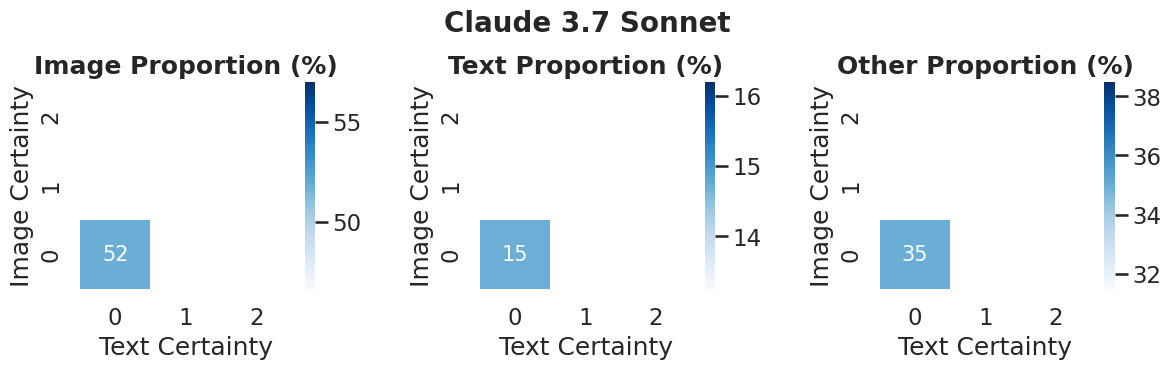

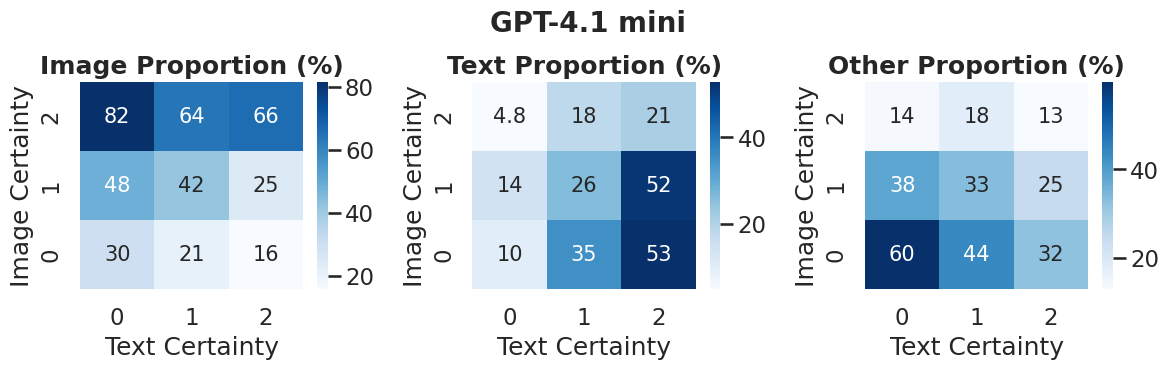

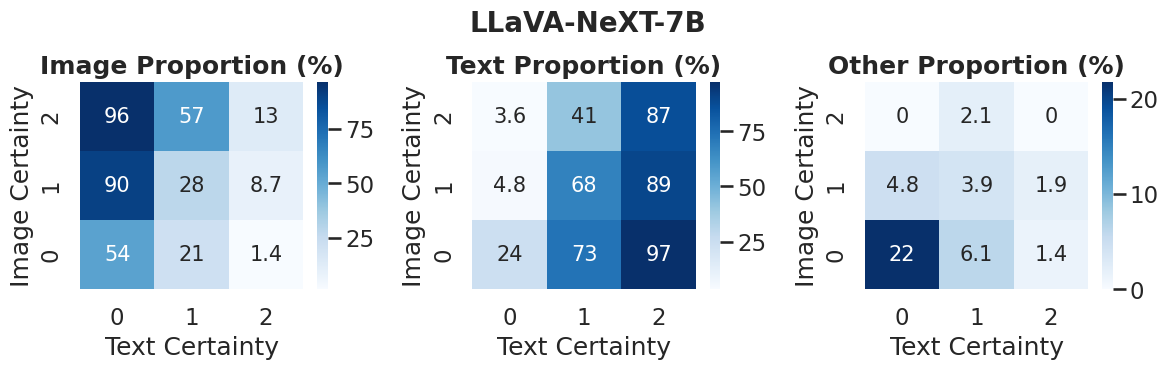

In [64]:
# generate heatmap based on the conf and the usage of img and text or others
import seaborn as sns
import matplotlib.pyplot as plt

# for a model and a dataset, we concatenate all the prompts results
# all_group_conf_df 
bins = 3

# set font size
# sns.set('talk', font_scale=1.5)
sns.set_context("talk")
plt.rcParams.update({'font.size': 15})

# for (ds, model), group in all_group_conf_df.groupby(['dataset', 'model']):
for (model), group in all_group_conf_df.groupby(['model']):
    model = model_mapping[model[0]]
    
    if 'claude' in str(model): continue # they don have confidence
    
    img_conf = np.concatenate(group['img_conf'].values)
    text_conf = np.concatenate(group['text_conf'].values)
    use_imgs = np.concatenate(group['use_imgs'].values)
    use_texts = np.concatenate(group['use_texts'].values)
    use_others = np.concatenate(group['use_others'].values)
    
    # get the quantiles
    quantiles = np.linspace(0, 1, bins+1)
    
    img_conf_q = np.quantile(img_conf, quantiles)
    img_conf_q = np.append(img_conf_q, np.inf)
    text_conf_q = np.quantile(text_conf, quantiles)
    text_conf_q = np.append(text_conf_q, np.inf)
    
    img_conf_group = np.zeros_like(img_conf)
    text_conf_group = np.zeros_like(text_conf)
    
    # text acc > 0 could affect the results
    # filter_mask = text_accs <= 0
    filter_mask = np.ones_like(img_conf, dtype=bool)
    
    for i in range(bins):
        img_conf_group[(img_conf >= img_conf_q[i]) & (img_conf < img_conf_q[i+1])] = i
        text_conf_group[(text_conf >= text_conf_q[i]) & (text_conf < text_conf_q[i+1])] = i
        # img_text_conf_group[(img_text_conf >= img_text_conf_q[i]) & (img_text_conf < img_text_conf_q[i+1])] = i
        
    img_conf_group[(img_conf >= img_conf_q[bins])] = bins
    text_conf_group[(text_conf >= text_conf_q[bins])] = bins
    # img_text_conf_group[(img_text_conf >= img_text_conf_q[bins])] = bins
    
    img_ratio_group = np.zeros((bins, bins))
    text_ratio_group = np.zeros((bins, bins))
    other_ratio_group = np.zeros((bins, bins))
    
    for i in range(bins):
        for j in range(bins):
            img_ratio_group[i, j] = np.mean(use_imgs[(img_conf_group == i) & (text_conf_group == j) & filter_mask]) * 100
            text_ratio_group[i, j] = np.mean(use_texts[(img_conf_group == i) & (text_conf_group == j) & filter_mask ]) * 100
            other_ratio_group[i, j] = np.mean(use_others[(img_conf_group == i) & (text_conf_group == j) & filter_mask ]) * 100
         
    # plot the heatmap
    # fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    fig, ax = plt.subplots(1, 3, figsize=(12, 4))
    sns.heatmap(img_ratio_group, annot=True, ax=ax[0], cmap='Blues')
    ax[0].set_title('Image Proportion (%)', fontweight='bold')
    ax[0].set_xlabel('Text Certainty')
    ax[0].set_ylabel('Image Certainty')
    ax[0].invert_yaxis()
        
    sns.heatmap(text_ratio_group, annot=True, ax=ax[1], cmap='Blues')
    ax[1].set_title('Text Proportion (%)', fontweight='bold')
    ax[1].set_xlabel('Text Certainty')
    ax[1].set_ylabel('Image Certainty')
    ax[1].invert_yaxis()

    
    sns.heatmap(other_ratio_group, annot=True, ax=ax[2], cmap='Blues')
    ax[2].set_title('Other Proportion (%)', fontweight='bold')
    ax[2].set_xlabel('Text Certainty')
    ax[2].set_ylabel('Image Certainty')
    ax[2].invert_yaxis()


    # plt.suptitle(f'{model} {ds}')
    plt.suptitle(f'{model}', fontweight='bold', fontsize=20, y=0.93)
    plt.tight_layout()
    plt.show()
    



In [65]:
# group['img_conf'].values.shape
# group['use_imgs'].shape
# use_imgs.shape, sum(use_imgs), sum(use_texts), sum(use_others)

In [66]:
# status_group_res_df[status_group_res_df['status_group'] == 'avg']

In [67]:
# Sample DataFrame (replace this with your actual DataFrame)
data = {
    'prompt': ['prompt_1', 'prompt_1', 'prompt_1', 'prompt_2', 'prompt_2', 'prompt_2', 'prompt_3', 'prompt_3', 'prompt_3', 'prompt_4', 'prompt_4', 'prompt_4'],
    'status_group': ['img', 'text', 'both', 'img', 'text', 'neither', 'img', 'text', 'undefined', 'img', 'text', 'both'],
    'count': [200, 150, 50, 180, 120, 100, 220, 100, 80, 250, 100, 50]
}

# only include status_group in ['img', 'text', 'both', 'neither', 'undefined']




In [68]:
# confidence based on ana_res_df
conf_ana_df = status_group_res_df.copy()
# conf_ana_df['status_group'] = conf_ana_df['status_group'].replace({'both': 'other', 'neither': 'other', 'undefined': 'other'})

# fill nan with 0
conf_ana_df['img_conf'] = conf_ana_df['img_conf'].fillna(0)
conf_ana_df['text_conf'] = conf_ana_df['text_conf'].fillna(0)
conf_ana_df['img_text_conf'] = conf_ana_df['img_text_conf'].fillna(0)

# exclude avg row
conf_ana_df = conf_ana_df[conf_ana_df['status_group'] != 'avg']
conf_ana_df = conf_ana_df[conf_ana_df['status_group'] != 'same']

conf_ana_df['prompt'] = conf_ana_df['prompt'].apply(lambda x: res_prompt_mapping[x])
conf_ana_df['model'] = conf_ana_df['model'].apply(lambda x: model_mapping[x])

# group by dataset, model, prompt and calculate the mean of img_conf, text_conf, img_text_conf weighted based on 'count' under different status_group
show_conf_ana_df =  conf_ana_df.groupby(['dataset', 'model', 'prompt']).apply(lambda x: np.average(x['img_text_conf'], weights=x['count']))

show_conf_ana_df
# average over status_group with count as weighted average


# show the average img_text_conf under different prompts and status_group


/tmp/ipykernel_142131/1096683850.py:18: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  show_conf_ana_df =  conf_ana_df.groupby(['dataset', 'model', 'prompt']).apply(lambda x: np.average(x['img_text_conf'], weights=x['count']))


dataset         model              prompt    
lmms-lab/VQAv2  Claude 3.7 Sonnet  conflict      0.000000
                                   irrelevant    0.000000
                                   match         0.000000
                GPT-4.1 mini       conflict      0.860109
                                   irrelevant    0.846499
                                   match         0.856738
                LLaVA-NeXT-7B      conflict      0.907075
                                   irrelevant    0.817965
                                   match         0.887226
dtype: float64

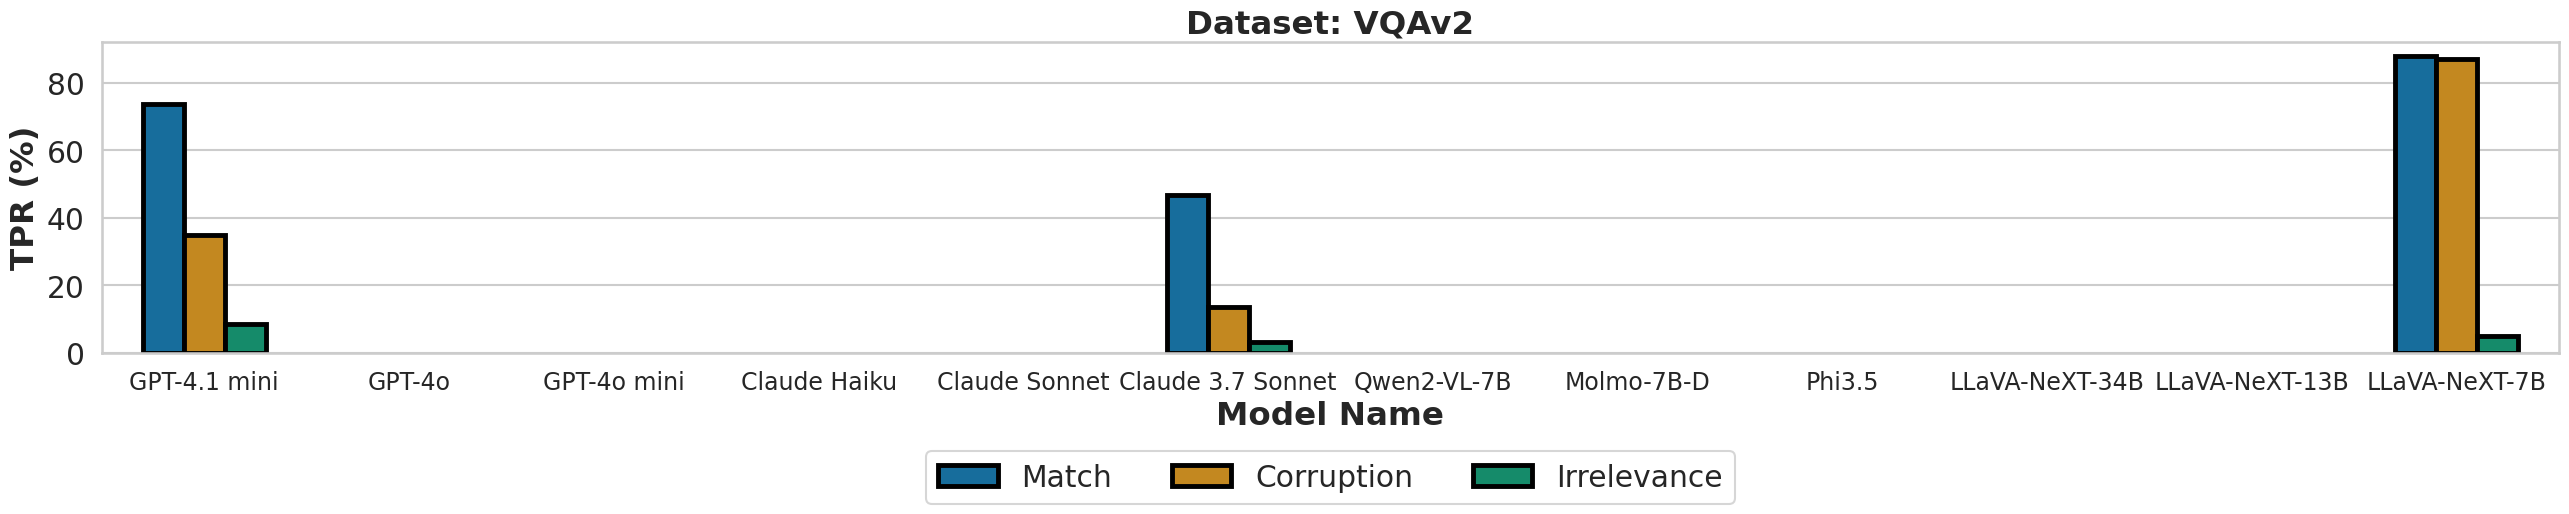

In [71]:
ana_res_df = status_group_res_df[status_group_res_df['status_group'].isin(['img', 'text', 'both', 'neither', 'undefined'])]

df = ana_res_df.copy()

# Step 1: Group the 'both', 'neither', 'undefined' as 'other'
df['status_group'] = df['status_group'].replace({'both': 'other', 'neither': 'other', 'undefined': 'other'})
df['prompt'] = df['prompt'].apply(lambda x: res_prompt_mapping[x])
df['model'] = df['model'].replace(model_mapping)

# grouped = df.groupby(['dataset', 'model'])

# Group by 'dataset', 'model', 'prompt', and 'status_group' and sum the 'count'
grouped_prompt = df.groupby(['dataset', 'model', 'prompt', 'status_group']).agg({'count': 'sum'}).reset_index()

# Pivot table to calculate 'text' over 'text + img' per model and prompt
pivot_prompt_df = grouped_prompt.pivot_table(index=['dataset', 'model', 'prompt'], columns='status_group', values='count', fill_value=0).reset_index()

# Add a new column 'text_ratio' which is text count / (text count + img count)
pivot_prompt_df['text_ratio'] = pivot_prompt_df['text'] / (pivot_prompt_df['text'] + pivot_prompt_df['img']) * 100

# Displaying the pivot_df for review
# import ace_tools as tools; tools.display_dataframe_to_user(name="Pivot DataFrame", dataframe=pivot_df)

conflict_sorted = pivot_prompt_df[pivot_prompt_df['prompt'] == 'conflict'].sort_values(by='text_ratio')

# Extract the sorted 'model' names based on the sorted conflict text ratio
sorted_models = conflict_sorted['model'].tolist()

# Displaying the sorted_models list
sorted_models



# closed model first; then open model
custom_model_order = [
    'GPT-4.1 mini',
    'GPT-4o',
    'GPT-4o mini',
    'Claude Haiku',    
    'Claude Sonnet',
    'Claude 3.7 Sonnet',

    'Qwen2-VL-7B',
    'Molmo-7B-D',
    'Phi3.5',
    'LLaVA-NeXT-34B',
    'LLaVA-NeXT-13B',
    'LLaVA-NeXT-7B',
    # 'LLaVA-v1.5-13B',
    # 'LLaVA-v1.5-7B',
]

# rename prompts
mapping = {
    'match': 'Match',
    'conflict': 'Corruption',
    'irrelevant': 'Irrelevance'
}

ds_mapping = {
    'lmms-lab/VQAv2': 'VQAv2',
    'lmms-lab/DocVQA/DocVQA': 'DocVQA',
}

new_ds_names = []

for ds in pivot_prompt_df['dataset'].unique():
    if ds in ds_mapping:
        new_ds_names.append(ds_mapping[ds])
    else:
        new_ds_names.append(ds)

pivot_prompt_df['prompt'] = pivot_prompt_df['prompt'].apply(lambda x: mapping[x])
pivot_prompt_df['dataset'] = pivot_prompt_df['dataset'].apply(lambda x: ds_mapping[x])

# font size

sns.set_context('talk', font_scale=1.3)
sns.set_style('whitegrid')
sns.set_palette('colorblind')

plt.rcParams.update({'font.size': 15})
hue_order = ['Match', 'Corruption', 'Irrelevance']

if len(new_ds_names) == 1:
    fig, ax = plt.subplots(figsize=(26, 6))
    subset = pivot_prompt_df[pivot_prompt_df['dataset'] == new_ds_names[0]]
    subset = subset.set_index('model').loc[sorted_models].reset_index()  # Sorting based on conflict
    # sns.lineplot(ax=ax, data=subset, x='model', y='text_ratio', hue='prompt')
    sns.barplot(ax=ax, data=subset, x='model', y='text_ratio', hue='prompt', width=0.6, order=custom_model_order, hue_order=hue_order, linewidth=3.5, edgecolor='black')
    ax.set_title(f'Dataset: {new_ds_names[0]}', fontweight='bold')
    # ax.set_ylabel('Text Ratio (%)', fontweight='bold')
    ax.set_ylabel('TPR (%)', fontweight='bold')
    ax.set_xlabel('Model Name', fontweight='bold')
    # ax.tick_params(axis='x', rotation=90)
    ax.tick_params(axis='x', labelsize=17)
    
    ax.legend(loc='center', bbox_to_anchor=(0.5, -0.4), ncols=3)
else:
    fig, axs = plt.subplots(len(new_ds_names), 1, figsize=(10, 5 * len(new_ds_names)), sharex=True)
    for i, dataset in enumerate(new_ds_names):
        subset = pivot_prompt_df[pivot_prompt_df['dataset'] == dataset]
        subset = subset.set_index('model').loc[sorted_models].reset_index()  # Sorting based on conflict
        # sns.lineplot(ax=axs[i], data=subset, x='model', y='text_ratio', hue='prompt')
        
        sns.barplot(ax=axs[i], data=subset, x='model', y='text_ratio', hue='prompt', width=0.5, order=custom_model_order, hue_order=hue_order)
        axs[i].set_title(f'Dataset: {dataset}')
        # axs[i].set_ylabel('Text Ratio (%)')
        axs[i].set_ylabel('TPR (%)')
        axs[i].set_xlabel('Model Name')
        # axs[i].tick_params(axis='x', rotation=90)
        axs[i].tick_params(axis='x')
        
        # add dash line for 50%, gray color
        axs[i].axhline(y=50, color='gray', linestyle='--')

    # plt.legend(loc='center', bbox_to_anchor=(0.5, -0.3), ncols=3)


plt.tight_layout()
# plt.show()
# df

# plt.savefig('figures/text_ratio_models_VQAv2.png', bbox_inches='tight', dpi=300)
# plt.savefig('figures/text_ratio_models_VQAv2.pdf', bbox_inches='tight', dpi=300)

# plt.savefig('figures/text_ratio_models_DocVQA.png', bbox_inches='tight', dpi=300)
# plt.savefig('figures/text_ratio_models_DocVQA.pdf', bbox_inches='tight', dpi=300)


In [72]:
df_merged

,Dataset,Model,Img Acc,Match,Conflict,Irrelevant
0,lmms-lab/VQAv2,claude-3-7-sonnet-20250219,71.84,82.30,72.78,74.38
1,lmms-lab/VQAv2,gpt-4.1-mini-2025-04-14,75.22,83.60,66.00,75.96
2,lmms-lab/VQAv2,llava-hf-llava-v1.6-vicuna-7b-hf,81.06,93.16,28.00,80.58


In [73]:
pivot_prompt_df

status_group,dataset,model,prompt,img,other,text,text_ratio
0,VQAv2,Claude 3.7 Sonnet,Corruption,204.0,254.0,32.0,13.559322
1,VQAv2,Claude 3.7 Sonnet,Irrelevance,240.0,234.0,8.0,3.225806
2,VQAv2,Claude 3.7 Sonnet,Match,104.0,204.0,92.0,46.938776
3,VQAv2,GPT-4.1 mini,Corruption,151.0,225.0,81.0,34.913793
4,VQAv2,GPT-4.1 mini,Irrelevance,232.0,183.0,22.0,8.661417
5,VQAv2,GPT-4.1 mini,Match,58.0,105.0,162.0,73.636364
6,VQAv2,LLaVA-NeXT-7B,Corruption,53.0,28.0,360.0,87.167070
7,VQAv2,LLaVA-NeXT-7B,Irrelevance,306.0,22.0,16.0,4.968944
8,VQAv2,LLaVA-NeXT-7B,Match,17.0,15.0,123.0,87.857143


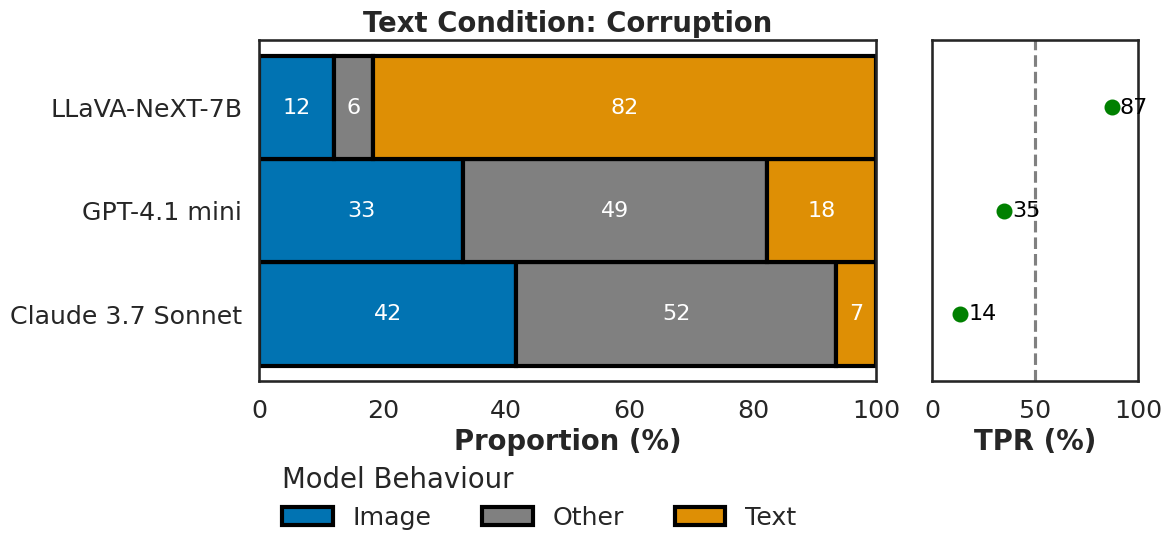

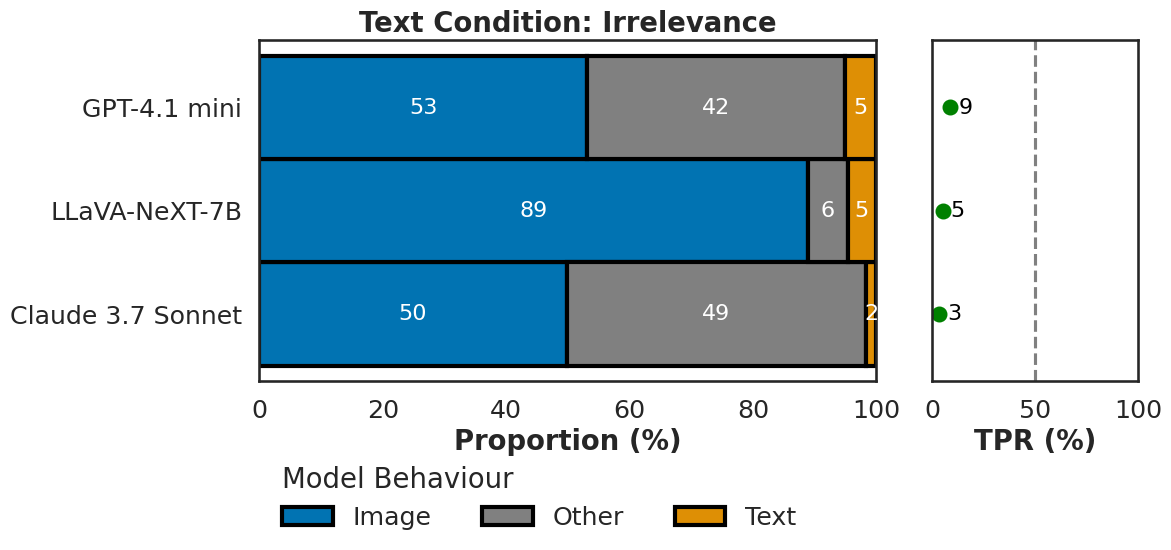

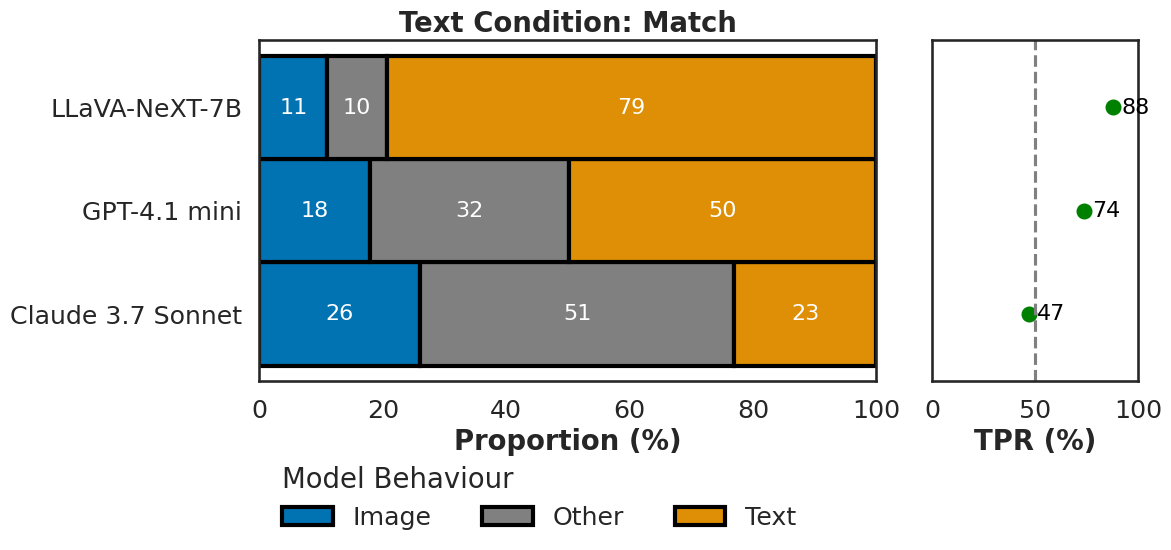

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
df = ana_res_df.copy()

# Step 1: Group the 'both', 'neither', 'undefined' as 'other'
df['status_group'] = df['status_group'].replace({'both': 'other', 'neither': 'other', 'undefined': 'other'})
df['prompt'] = df['prompt'].apply(lambda x: res_prompt_mapping[x])
df['model'] = df['model'].replace(model_mapping)

mapping = {
    'conflict': 'Corruption',
    'match': 'Match',
    'irrelevant': 'Irrelevance',
}

# Step 1: Group the data by 'prompt'
grouped = df.groupby('prompt')

# set larger font size
sns.set_context("talk", font_scale=1.1)
sns.set_style("white")
plt.rcParams.update({'font.size': 16})
sns.set_palette("colorblind")

# Iterate through each prompt and plot separately
for prompt, data in grouped:
    
    # Step 2: Pivot the data by model and calculate the total count per group
    pivot_df = data.pivot_table(index='model', columns='status_group', values='count', aggfunc='sum', fill_value=0)
    
    # Calculate the percentage for each status group
    pivot_df['total'] = pivot_df.sum(axis=1)
    pivot_df['img_pct'] = pivot_df['img'] / pivot_df['total'] * 100
    pivot_df['text_pct'] = pivot_df['text'] / pivot_df['total'] * 100
    pivot_df['other_pct'] = pivot_df[['other']].sum(axis=1) / pivot_df['total'] * 100

    # Step 3: Calculate the MR metric
    pivot_df['MR'] = pivot_df['text'] / (pivot_df['img'] + pivot_df['text']) * 100
    
    sorted_data = pivot_df.sort_values(by='MR', ascending=True)

    # Set the custom order for 'prompt'
    sorted_data.index = pd.Categorical(sorted_data.index, categories=sorted_data.index, ordered=True)


    # Create subplots for each prompt, with models on the y-axis
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6), sharey=True, gridspec_kw={'width_ratios': [3, 1]})
    
    # ---------------- Plot 1: Stacked Bar Chart ----------------
    labels = sorted_data.index  # Models as the y-axis
    img_pct = sorted_data['img_pct']
    text_pct = sorted_data['text_pct']
    other_pct = sorted_data['other_pct']
    
    bar_width = 1
    
    # Stacked bar chart on the left subplot (ax1)

    bar1 = ax1.barh(labels, img_pct, color='C0', label='Image', height=bar_width, alpha=1, linewidth=3, edgecolor='black')  # Substitute (Blue)
    bar2 = ax1.barh(labels, other_pct, left=img_pct, color='gray', label='Other', height=bar_width, alpha=1, linewidth=3, edgecolor='black')  # Other (Orange)
    bar3 = ax1.barh(labels, text_pct, left=img_pct + other_pct, color='C1', label='Text', height=bar_width, alpha=1, linewidth=3, edgecolor='black')  # Original (Red)
        

    # Add labels to each bar
    for bars in [bar1, bar2, bar3]:
        for bar in bars:
            width = bar.get_width()
            if width > 0:
                ax1.text(bar.get_x() + width / 2, bar.get_y() + bar.get_height() / 2, f'{width:.0f}', ha='center', va='center', color='white')
                # ax1.text(bar.get_x() + width / 2, bar.get_y() + bar.get_height() / 2, f'{width:.0f}', ha='center', va='center', color='black', fontweight='bold')
    
    # Customize the stacked bar chart
    # the first character of the prompt is capitalized
    # ax1.set_title(f'Prediction Behavior for {prompt.capitalize()} Text')
    ax1.set_xlim([0, 100])

    ax1.set_xlabel('Proportion (%)', fontweight='bold')
    ax1.set_title(f'Text Condition: {mapping[prompt]}', fontweight='bold')
    # ax1.legend(title='Prediction Behavior', loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)
    legend = ax1.legend(title='Model Behaviour', loc='upper left', bbox_to_anchor=(0, -0.18), ncol=3, frameon=False)
    legend._legend_box.align = "left"

    # ---------------- Plot 2: Scatter Plot (MR) ----------------
    # Scatter plot for the MR metric on the right subplot (ax2)
    ax2.scatter(sorted_data['MR'], labels, color='green', s=100)
    
    # Add labels next to the scatter points
    for i, value in enumerate(sorted_data['MR']):
        ax2.text(value + 4, i, f'{value:.0f}', va='center', color='black')
    
    # Customize the scatter plot (MR), ensuring the range is 0-100 and centered around 50
    ax2.set_xlim(0, 100)
    ax2.axvline(50, color='gray', linestyle='--')  # Vertical line at 50%
    
    # if prompt == 'match': text ratio higher better
    # if prompt == 'conflict': text ratio lower better
    # if prompt == 'irrelevant': text ratio lower better
    # set a arrow to indicate the direction to the right of the text ratio
    arrow = "\u2191" if prompt == 'match' else "\u2193"
    
    # ax2.set_xlabel('Text Ratio (%) {}'.format(arrow))
    # ax2.set_xlabel('Text Ratio (%)', fontweight='bold')
    # ax2.set_xlabel('Text Preference Ratio (%)', fontweight='bold')
    ax2.set_xlabel('TPR (%)', fontweight='bold')
    
    # Adjust layout to avoid overlap and display
    plt.tight_layout()
    # plt.show()
    # plt.savefig(f'figures/pred_behaviors_{prompt}.pdf', bbox_inches='tight')
    # plt.savefig(f'figures/pred_behaviors_{prompt}.png', bbox_inches='tight')
    # plt.savefig(f'figures/pred_behaviors_{prompt}_2.pdf', dpi=300, bbox_inches='tight')
    # plt.savefig(f'figures/pred_behaviors_{prompt}_2.png', dpi=300, bbox_inches='tight')

/tmp/ipykernel_142131/531183709.py:89: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.05, 1, 1])  # Adjust layout to fit legend


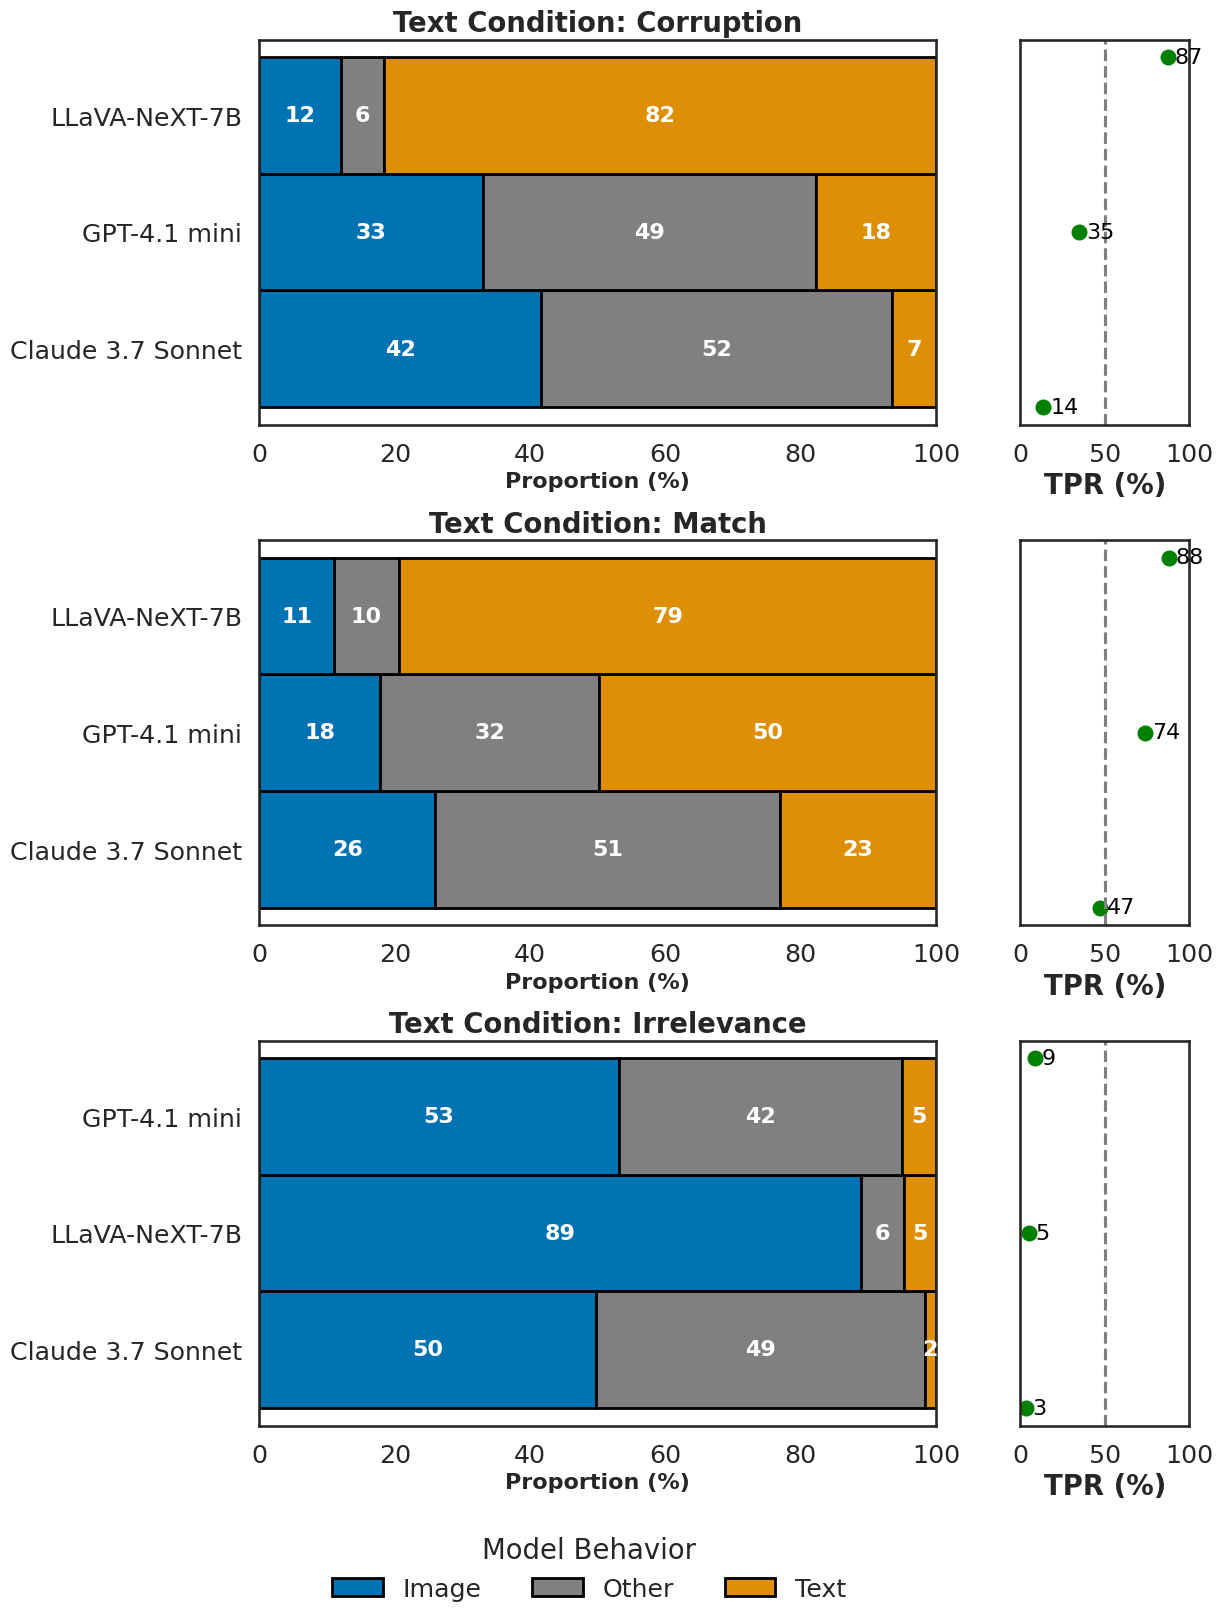

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame
df = ana_res_df.copy()

# Group the 'both', 'neither', 'undefined' as 'other'
df['status_group'] = df['status_group'].replace({'both': 'other', 'neither': 'other', 'undefined': 'other'})
df['prompt'] = df['prompt'].apply(lambda x: res_prompt_mapping[x])
df['model'] = df['model'].replace(model_mapping)

mapping = {
    'conflict': 'Corruption',
    'match': 'Match',
    'irrelevant': 'Irrelevance',
}

# grouped = df.groupby('prompt')
ordered_prompts = ['conflict', 'match', 'irrelevant']
grouped = df.groupby('prompt')
grouped = {k: grouped.get_group(k) for k in ordered_prompts}

# Set larger font size and style
sns.set_context("talk", font_scale=1.1)
sns.set_style("white")
plt.rcParams.update({'font.size': 16})
sns.set_palette("colorblind")

# Create a figure with subplots for each prompt
fig, axs = plt.subplots(nrows=len(grouped), ncols=2, figsize=(12, 6 * len(grouped)),
                        gridspec_kw={'width_ratios': [4, 1], 'hspace': 0.3})
# fig.subplots_adjust(bottom=0.2)  # Adjust bottom to fit legend

# Iterate through each prompt and plot as a subfigure
for idx, (prompt, data) in enumerate(grouped.items()):
    
    # Access the two subplots for each row, sharing the y-axis within the row only
    ax1 = axs[idx, 0]
    ax2 = axs[idx, 1]
    
    # Step 2: Pivot the data by model and calculate the total count per group
    pivot_df = data.pivot_table(index='model', columns='status_group', values='count', aggfunc='sum', fill_value=0)
    pivot_df['total'] = pivot_df.sum(axis=1)
    pivot_df['img_pct'] = pivot_df['img'] / pivot_df['total'] * 100
    pivot_df['text_pct'] = pivot_df['text'] / pivot_df['total'] * 100
    pivot_df['other_pct'] = pivot_df[['other']].sum(axis=1) / pivot_df['total'] * 100
    pivot_df['MR'] = pivot_df['text'] / (pivot_df['img'] + pivot_df['text']) * 100  # TPR calculation
    
    # Sort by TPR (MR) and update labels
    sorted_data = pivot_df.sort_values(by='MR', ascending=True)  # Sort by TPR (MR)
    labels = sorted_data.index

    # Plot 1: Stacked Bar Chart with sorted order
    img_pct, text_pct, other_pct = sorted_data['img_pct'], sorted_data['text_pct'], sorted_data['other_pct']
    bar1 = ax1.barh(labels, img_pct, color='C0', label='Image', height=1, alpha=1, linewidth=2, edgecolor='black')
    bar2 = ax1.barh(labels, other_pct, left=img_pct, color='gray', label='Other', height=1, alpha=1, linewidth=2, edgecolor='black')
    bar3 = ax1.barh(labels, text_pct, left=img_pct + other_pct, color='C1', label='Text', height=1, alpha=1, linewidth=2, edgecolor='black')
    ax1.set_xlim([0, 100])
    ax1.set_title(f'Text Condition: {mapping[prompt]}', fontweight='bold')
    ax1.set_xlabel('Proportion (%)', fontweight='bold', fontsize=16)
    ax1.set_yticks(range(len(labels)))
    ax1.set_yticklabels(labels)  # Ensure the y-tick labels reflect sorted order

    # Add text labels inside the bars
    for bar_group in [bar1, bar2, bar3]:
        for bar in bar_group:
            width = bar.get_width()
            if width > 0:
                ax1.text(bar.get_x() + width / 2, bar.get_y() + bar.get_height() / 2, f'{width:.0f}', 
                         ha='center', va='center', color='white', fontweight='bold')

    # Plot 2: Scatter Plot for MR metric with sorted labels
    ax2.scatter(sorted_data['MR'], labels, color='green', s=100)
    ax2.set_yticks(range(len(labels)))
    ax2.set_yticklabels([])  # Hide y-tick labels on the right subfigure
    for i, value in enumerate(sorted_data['MR']):
        ax2.text(value + 4, i, f'{value:.0f}', va='center', color='black')
    ax2.set_xlim(0, 100)
    ax2.axvline(50, color='gray', linestyle='--')
    arrow = "\u2191" if prompt == 'match' else "\u2193"
    # ax2.set_xlabel(f'TPR (%) {arrow}', fontweight='bold')
    ax2.set_xlabel(f'TPR (%)', fontweight='bold')

# Shared legend for all plots, positioned at the bottom
handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, title='Model Behavior', loc='lower center', bbox_to_anchor=(0.4, 0), ncol=3, frameon=False)
# fig.legend(handles, labels, title='Model Behavior', loc='lower center', bbox_to_anchor=(0.4, 0), ncol=3)
plt.tight_layout(rect=[0, 0.05, 1, 1])  # Adjust layout to fit legend

# Show or save the figure
# plt.show()
# plt.savefig('figures/combined_prediction_behavior.pdf', dpi=300, bbox_inches='tight')
# plt.savefig('figures/combined_prediction_behavior.png', dpi=300, bbox_inches='tight')


In [76]:
# status_group_res_df